In [1]:
import pandas as pd

df1 = pd.read_csv('archive/train.csv')
df2 = pd.read_csv('archive/test.csv')

df = pd.concat([df1, df2], ignore_index=True)

In [2]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
categories = df.columns.tolist()

for category in categories:
    print(category)

Unnamed: 0
id
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [4]:
df = df.drop(columns=['id', 'Unnamed: 0'])

In [5]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female': 0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

age_bins = [0, 17, 35, 64, float('inf')]
age_labels = ['Juvenile', 'Young Adult', 'Adult', 'Elderly']

# Create a new column 'Age Group' with the categorical age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# One-hot encode the 'Age Group' column
df = pd.get_dummies(df, columns=['Age Group'])


In [6]:
df = df.drop(columns=['Age'])
df.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group_Juvenile,Age Group_Young Adult,Age Group_Adult,Age Group_Elderly
0,1,1,Personal Travel,Eco Plus,460,3,4,3,1,5,...,4,5,5,25,18.0,neutral or dissatisfied,1,0,0,0
1,1,0,Business travel,Business,235,3,2,3,3,1,...,1,4,1,1,6.0,neutral or dissatisfied,0,1,0,0
2,0,1,Business travel,Business,1142,2,2,2,2,5,...,4,4,5,0,0.0,satisfied,0,1,0,0
3,0,1,Business travel,Business,562,2,5,5,5,2,...,1,4,2,11,9.0,neutral or dissatisfied,0,1,0,0
4,1,1,Business travel,Business,214,3,3,3,3,4,...,3,3,3,0,0.0,satisfied,0,0,1,0


In [7]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [8]:
travel_type_mapping = {
    'Personal Travel': 0,
    'Business travel': 1
    # Add any other variations if necessary
}

# Map the 'Type of Travel' column
df['Type of Travel'] = df['Type of Travel'].map(travel_type_mapping)


In [9]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [10]:
class_mapping = {
    'Eco': 1,
    'Eco Plus': 2,
    'Business': 3
    # Add any other variations if necessary
}

# Map the 'Class' column
df['Class'] = df['Class'].map(class_mapping)


In [11]:
# Normalize the 'Flight Distance' column
min_distance = df['Flight Distance'].min()
max_distance = df['Flight Distance'].max()

# Handle cases where max_distance equals min_distance
if max_distance - min_distance != 0:
    df['Flight Distance'] = (df['Flight Distance'] - min_distance) / (max_distance - min_distance)
else:
    df['Flight Distance'] = 0.0  # All distances are the same


In [12]:
# Convert to numeric and handle non-numeric entries
df['Departure Delay in Minutes'] = pd.to_numeric(df['Departure Delay in Minutes'], errors='coerce')

# Handle missing values
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].fillna(0)

# Perform min-max normalization
min_departure_delay = df['Departure Delay in Minutes'].min()
max_departure_delay = df['Departure Delay in Minutes'].max()

if max_departure_delay - min_departure_delay != 0:
    df['Departure Delay in Minutes'] = (df['Departure Delay in Minutes'] - min_departure_delay) / (max_departure_delay - min_departure_delay)
else:
    df['Departure Delay in Minutes'] = 0.0  # All values are the same


In [13]:
# Convert to numeric and handle non-numeric entries
df['Arrival Delay in Minutes'] = pd.to_numeric(df['Arrival Delay in Minutes'], errors='coerce')

# Handle missing values
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

# Perform min-max normalization
min_arrival_delay = df['Arrival Delay in Minutes'].min()
max_arrival_delay = df['Arrival Delay in Minutes'].max()

if max_arrival_delay - min_arrival_delay != 0:
    df['Arrival Delay in Minutes'] = (df['Arrival Delay in Minutes'] - min_arrival_delay) / (max_arrival_delay - min_arrival_delay)
else:
    df['Arrival Delay in Minutes'] = 0.0  # All values are the same


In [14]:
satisfaction_mapping = {
    'satisfied': 1,
    'neutral or dissatisfied': 0
    # Add other variations if necessary
}

df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)


In [15]:
df.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group_Juvenile,Age Group_Young Adult,Age Group_Adult,Age Group_Elderly
0,1,1,0,2,0.086632,3,4,3,1,5,...,4,5,5,0.015704,0.011364,0,1,0,0,0
1,1,0,1,3,0.041195,3,2,3,3,1,...,1,4,1,0.000628,0.003788,0,0,1,0,0
2,0,1,1,3,0.224354,2,2,2,2,5,...,4,4,5,0.000000,0.000000,1,0,1,0,0
3,0,1,1,3,0.107229,2,5,5,5,2,...,1,4,2,0.006910,0.005682,0,0,1,0,0
4,1,1,1,3,0.036955,3,3,3,3,4,...,3,3,3,0.000000,0.000000,1,0,0,1,0


## Now, we can train the model

In [16]:
# Train/Test split
import numpy as np
from sklearn.model_selection import train_test_split
import plotly

X = df
y = df.satisfaction

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)


In [17]:
##### Copying the instructor's Python class for Binary Logistic Regression

import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        Xb = np.array(Xb)
        # Xb = Xb.reshape(1, -1)  # Reshape to (1, n_features)
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)



# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'


    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[0]
        else:
            return None

        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            xi = np.array(xi)
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


Base Binary Logistic Regression Object, Not Trainable


In [18]:
%%time
# Now we can train the classifier
blr = BinaryLogisticRegression(eta=0.1,iterations=12)
blr.fit(X_train,y_train)
print(blr)

Binary Logistic Regression Object with coefficients:
[[-0.04140278]
 [-0.01603868]
 [ 0.00872259]
 [ 0.09077719]
 [ 0.1885799 ]
 [ 0.02515005]
 [ 0.10713777]
 [-0.15704518]
 [ 0.02714431]
 [-0.1138881 ]
 [ 0.02630277]
 [ 0.25095379]
 [ 0.1176936 ]
 [ 0.16483736]
 [ 0.10089348]
 [ 0.10055829]
 [ 0.0240358 ]
 [ 0.03923676]
 [ 0.02085422]
 [ 0.09242263]
 [-0.00110587]
 [-0.00122993]
 [ 0.27103301]
 [-0.02646374]
 [-0.03974996]
 [ 0.0403906 ]
 [-0.01557967]]
CPU times: user 6.19 s, sys: 80.6 ms, total: 6.27 s
Wall time: 6.3 s


## Optimizations
https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb 

### Baseline

In [20]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [21]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing 

blr = BinaryLogisticRegression(eta=0.1,iterations=50,C=0.001)

blr.fit(X_train,y_train)
print(blr)

yhat = blr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[-0.22401503]
 [-0.08320857]
 [-0.01250686]
 [ 0.2664767 ]
 [ 0.50829122]
 [ 0.07330426]
 [ 0.24687991]
 [-0.50316548]
 [-0.00123492]
 [-0.41337235]
 [-0.16497699]
 [ 0.58855623]
 [ 0.11879962]
 [ 0.32756157]
 [ 0.15653475]
 [ 0.14739162]
 [-0.10067485]
 [-0.0403923 ]
 [-0.11255473]
 [ 0.05544628]
 [-0.00488575]
 [-0.00539347]
 [ 1.00215072]
 [-0.09674676]
 [-0.15996908]
 [ 0.09581154]
 [-0.06188487]]
Accuracy of:  0.5674468740375731
CPU times: user 3.24 s, sys: 179 ms, total: 3.42 s
Wall time: 379 ms


### Line Search

In [22]:
%%time
# and we can update this to use a line search along the gradient like this:
from scipy.optimize import minimize_scalar
import copy
from numpy import ma # (masked array) this has most numpy functions that work with NaN data.
class LineSearchLogisticRegression(BinaryLogisticRegression):
    
    # define custom line search for problem
    def __init__(self, line_iters=0.0, **kwds):        
        self.line_iters = line_iters
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
    
    # this defines the function with the first input to be optimized
    # therefore eta will be optimized, with all inputs constant
    @staticmethod
    def objective_function(eta,X,y,w,grad,C):
        wnew = w - grad*eta
        g = expit(X @ wnew)
        # the line search is looking for minimization, so take the negative of l(w)
        return -np.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(wnew[1:]**2)
    
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization is in opposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.line_iters} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(0,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize
                
            

lslr = LineSearchLogisticRegression(eta=1.0,
                                    iterations=6, 
                                    line_iters=8, 
                                    C=0.001)

lslr.fit(X_train,y_train)

yhat = lslr.predict(X_test)
print(lslr)
print('Accuracy of: ',accuracy_score(y_test,yhat)) 

Binary Logistic Regression Object with coefficients:
[[-0.96184756]
 [-0.36414552]
 [-0.20203494]
 [ 0.65611103]
 [ 1.11571352]
 [ 0.18443356]
 [ 1.2282016 ]
 [-0.27142723]
 [ 0.60693334]
 [-0.45995915]
 [-1.19357788]
 [ 1.25018198]
 [-0.43590797]
 [ 0.47114638]
 [ 0.11150708]
 [-0.00869242]
 [-0.64911328]
 [-0.45476818]
 [-0.68498063]
 [-0.52144355]
 [-0.01952741]
 [-0.02152393]
 [ 3.53543561]
 [-0.32298862]
 [-0.56399349]
 [ 0.15515834]
 [-0.21854425]]
Accuracy of:  0.8104404065291038
CPU times: user 2.41 s, sys: 150 ms, total: 2.56 s
Wall time: 288 ms


### Stochastic Gradient Descent

In [23]:
%%time

class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        
        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)
        
        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False).ravel() # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    
slr = StochasticLogisticRegression(eta=0.01, iterations=100, C=0.001) # take a lot more steps!!

slr.fit(X_train,y_train)

yhat = slr.predict(X_test)
print(slr)
print('Accuracy of: ',accuracy_score(y_test,yhat)) 

Binary Logistic Regression Object with coefficients:
[[-0.05402689]
 [-0.02394923]
 [-0.01090063]
 [ 0.04357937]
 [ 0.09099872]
 [ 0.01290496]
 [ 0.05951738]
 [-0.15564035]
 [-0.01881746]
 [-0.12706107]
 [-0.03576839]
 [ 0.13292594]
 [ 0.02579321]
 [ 0.06809989]
 [ 0.01488809]
 [ 0.01690287]
 [-0.05617904]
 [-0.04008874]
 [-0.0570356 ]
 [ 0.00369857]
 [-0.00052022]
 [-0.00060711]
 [ 0.20185359]
 [-0.01490003]
 [-0.04063141]
 [ 0.01579819]
 [-0.01424195]]
Accuracy of:  0.7293270711425932
CPU times: user 54.8 ms, sys: 28.6 ms, total: 83.4 ms
Wall time: 18.3 ms


### Newton's Update Method

In [24]:
%%time

# note to future (2024) Eric: call this get_dirtection, instead of gradient

from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient
       
hlr = HessianBinaryLogisticRegression(eta=1.0,
                                      iterations=4,
                                      C=0.001) # note that we need only a few iterations here

hlr.fit(X_train,y_train)
yhat = hlr.predict(X_test)
print(hlr)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[-1.55809753e+00]
 [-7.29213631e-06]
 [ 5.76405409e-05]
 [ 6.70008350e-05]
 [ 2.66714216e-05]
 [-1.24013450e-04]
 [ 8.13638956e-06]
 [-5.16484979e-07]
 [-7.30152762e-06]
 [ 7.34095050e-06]
 [-1.86067482e-06]
 [ 2.19812236e-05]
 [ 6.44422183e-07]
 [ 2.67493848e-06]
 [ 6.27936189e-06]
 [ 1.74306190e-05]
 [ 1.47995484e-05]
 [ 8.94842394e-06]
 [-8.35988408e-06]
 [ 1.04319580e-05]
 [-5.52630211e-03]
 [-3.12452070e-03]
 [ 1.03880587e+01]
 [-3.63625876e+00]
 [-3.63624549e+00]
 [-3.63624906e+00]
 [-3.63629412e+00]]
Accuracy of:  1.0
CPU times: user 6min 5s, sys: 2min 26s, total: 8min 32s
Wall time: 1min 12s


### Quasi-Newton (Hessian)

In [25]:
%%time
# for this, we won't perform our own BFGS implementation 
# (it takes a fair amount of code and understanding, which we haven't setup yet)
# luckily for us, scipy has its own BFGS implementation:
from scipy.optimize import fmin_bfgs # maybe the most common bfgs algorithm in the world
from numpy import ma
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        # invert this because scipy minimizes, but we derived all formulas for maximzing
        return -ma.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(w**2) 
        #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))
            
bfgslr = BFGSBinaryLogisticRegression(_,iterations=3,C=0.001) # note that we need only a few iterations here

bfgslr.fit(X_train,y_train)
yhat = bfgslr.predict(X_test)
print(bfgslr)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[-0.22889036]
 [-0.09192476]
 [-0.02878171]
 [ 0.24737928]
 [ 0.46833867]
 [ 0.06732659]
 [ 0.20945316]
 [-0.59640452]
 [-0.04517175]
 [-0.50273977]
 [-0.19207441]
 [ 0.57572316]
 [ 0.09061932]
 [ 0.28360497]
 [ 0.09908464]
 [ 0.08950277]
 [-0.1711695 ]
 [-0.09948125]
 [-0.18259918]
 [ 0.02554931]
 [-0.00477807]
 [-0.00525797]
 [ 0.94020802]
 [-0.09566954]
 [-0.16221026]
 [ 0.08825718]
 [-0.05891094]]
Accuracy of:  0.7984678164459501
CPU times: user 1.22 s, sys: 211 ms, total: 1.43 s
Wall time: 154 ms


### BFGS and Newton's Method

In [26]:
# allow for the user to specify the algorithm they want to solver the binary case
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=BFGSBinaryLogisticRegression):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.classifiers_ = []
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            
            hblr = self.solver(eta=self.eta,iterations=self.iters,C=self.C)
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    

In [27]:
%%time
lr = MultiClassLogisticRegression(eta=1.0,
                                  iterations=4,
                                  C=0.01,
                                  solver=BFGSBinaryLogisticRegression
                                 )
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[ 0.30192466  0.09786518  0.03526689 -0.20623358 -0.35155635 -0.05995362
  -0.24691927  0.14556555 -0.05173294  0.20255685  0.31366088 -0.33504283
   0.09702752 -0.18793021 -0.06896362 -0.02389874  0.15206593  0.09071211
   0.16298404  0.11362737  0.00607363  0.0066947  -1.1188858   0.09614396
   0.16802307 -0.04688528  0.06900832]
 [-0.30192466 -0.09786518 -0.03526689  0.20623358  0.35155635  0.05995362
   0.24691927 -0.14556555  0.05173294 -0.20255685 -0.31366088  0.33504283
  -0.09702752  0.18793021  0.06896362  0.02389874 -0.15206593 -0.09071211
  -0.16298404 -0.11362737 -0.00607363 -0.0066947   1.1188858  -0.09614396
  -0.16802307  0.04688528 -0.06900832]]
Accuracy of:  0.8935940868493994
CPU times: user 2.78 s, sys: 226 ms, total: 3 s
Wall time: 337 ms


In [28]:

%%time
lr = MultiClassLogisticRegression(eta=1.0,
                                  iterations=6,
                                  C=0.001,
                                  solver=HessianBinaryLogisticRegression
                                 )
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[-1.14306804e+00  1.46292562e-04 -7.97958129e-04 -9.01694772e-04
  -4.44108403e-04  2.34421526e-03 -8.98939009e-05 -5.51140401e-06
   9.84765876e-05 -1.34881344e-04  2.96857526e-05 -3.37478771e-04
  -5.68783816e-06 -3.36958714e-05 -8.55066927e-05 -2.95707703e-04
  -2.60723298e-04 -1.32747470e-04  1.69973481e-04 -1.71493050e-04
   1.02004048e-01  5.91426255e-02 -1.44003380e+01  8.34786330e+00
   8.34763087e+00  8.34768820e+00  8.34845409e+00]
 [ 1.14306804e+00 -1.46292562e-04  7.97958129e-04  9.01694772e-04
   4.44108403e-04 -2.34421526e-03  8.98939009e-05  5.51140401e-06
  -9.84765877e-05  1.34881344e-04 -2.96857526e-05  3.37478771e-04
   5.68783816e-06  3.36958714e-05  8.55066927e-05  2.95707703e-04
   2.60723298e-04  1.32747470e-04 -1.69973481e-04  1.71493050e-04
  -1.02004048e-01 -5.91426255e-02  1.44003380e+01 -8.34786330e+00
  -8.34763087e+00 -8.34768820e+00 -8.34845409e+00]]
Accuracy of:  1.0
CPU times: user 19min 8s, sys:

### Comparing to SKLearn

In [29]:
%%time
# actually, we aren't quite as good as the lib linear implementation
# how do we compare now to sklearn?
from sklearn.linear_model import LogisticRegression

lr_sk = LogisticRegression(solver='liblinear',n_jobs=1, 
                           multi_class='ovr', C = 1/0.001, 
                           penalty='l2',max_iter=100) 

lr_sk.fit(X_train,y_train) # no need to add bias term, sklearn does it internally!!
print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-2.03747981e-01 -5.03770759e-01  3.60265422e-02  3.82210000e-02
   2.99264529e-01  1.56593242e-01  2.49058883e-02 -1.22796883e-01
  -9.87098426e-02 -1.83282408e-01 -5.81653441e-02 -2.08298764e-01
   4.05763655e-01 -2.33512204e-01 -8.51576438e-02 -2.07186086e-02
   4.07012873e-02 -8.35528354e-02 -6.22240775e-02 -1.48215616e-01
  -1.62795909e-01  2.26531137e+01 -1.75427604e+00 -2.01123245e+00
  -1.83651148e+00 -1.68459521e+00]]
Accuracy of:  1.0
CPU times: user 553 ms, sys: 1.76 s, total: 2.32 s
Wall time: 449 ms


### Discuss the Results
We compare and contrast the coefficients of the last two models used.

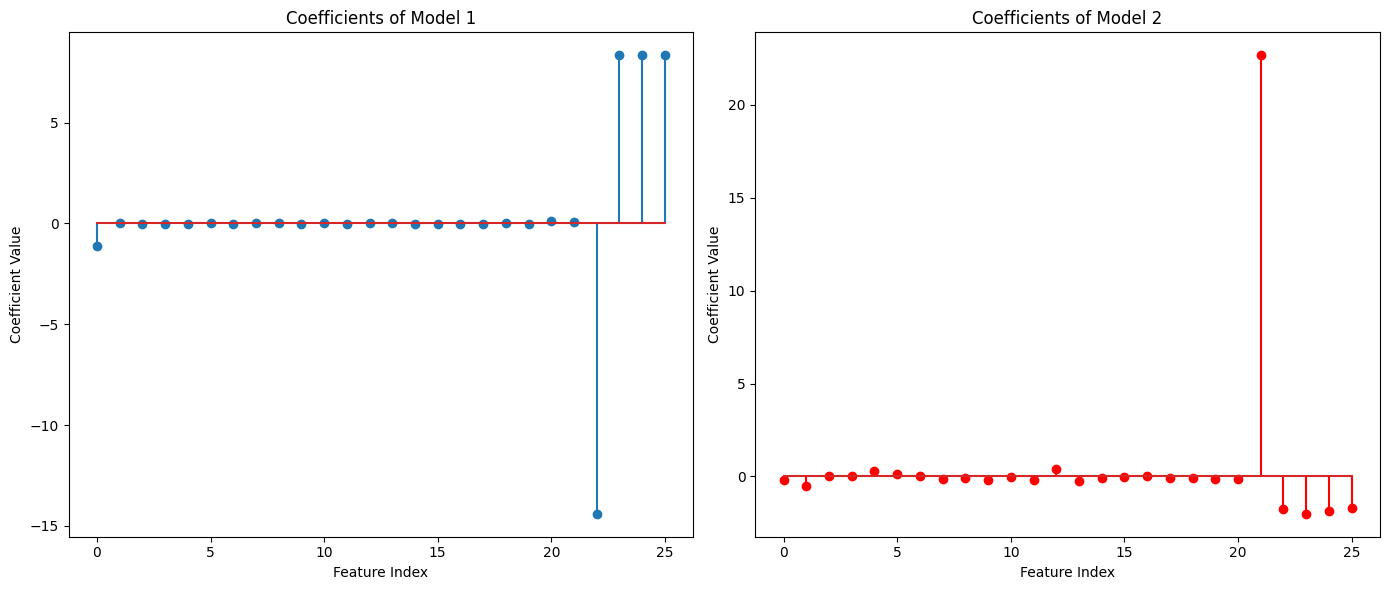

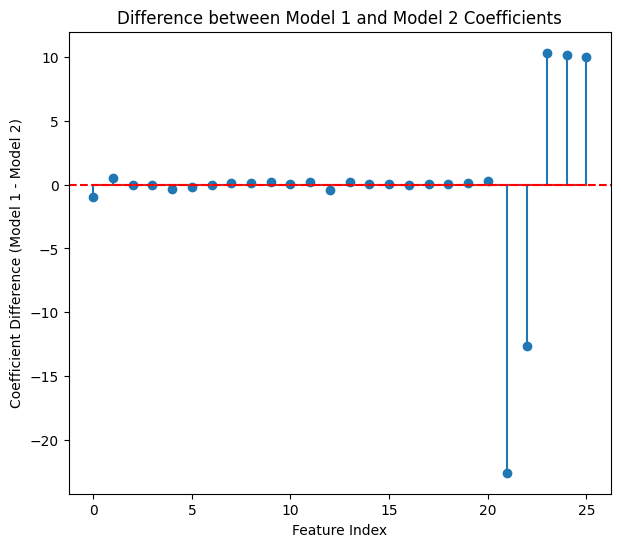

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from the first Logistic Regression model (Multiclass)
coefficients_model1 = np.array([
    [-1.14069320e+00,  1.46380014e-04, -8.37395727e-04, -9.26363147e-04,
     -4.42351694e-04,  2.31310889e-03, -9.32339393e-05,  6.98005509e-06,
      9.72906155e-05, -1.41990172e-04,  2.40511196e-05, -3.45858199e-04,
     -1.21930204e-05, -2.89222493e-06, -8.15770211e-05, -3.02051828e-04,
     -2.77282911e-04, -1.34849538e-04,  1.72902721e-04, -1.86039617e-04,
      1.04198632e-01,  6.29967038e-02, -1.44003018e+01,  8.34554884e+00,
      8.34528569e+00,  8.34538125e+00,  8.34614255e+00],
    [ 1.14069319e+00, -1.46380013e-04,  8.37395727e-04,  9.26363147e-04,
      4.42351694e-04, -2.31310889e-03,  9.32339393e-05, -6.98005509e-06,
     -9.72906155e-05,  1.41990172e-04, -2.40511195e-05,  3.45858199e-04,
      1.21930205e-05,  2.89222493e-06,  8.15770211e-05,  3.02051828e-04,
      2.77282911e-04,  1.34849537e-04, -1.72902721e-04,  1.86039617e-04,
     -1.04198632e-01, -6.29967038e-02,  1.44003018e+01, -8.34554884e+00,
     -8.34528568e+00, -8.34538125e+00, -8.34614255e+00]
])

# Coefficients from the second Logistic Regression model
coefficients_model2 = np.array([
    [-2.04601095e-01, -5.13916619e-01,  2.60922679e-02,  3.50335956e-02,
     3.03920630e-01,  1.50205277e-01,  3.25704323e-02, -1.19453778e-01,
    -1.05190430e-01, -1.84733802e-01, -5.43406770e-02, -2.04622594e-01,
     4.05073931e-01, -2.35399712e-01, -8.52469187e-02, -1.63073708e-02,
     3.71925669e-02, -8.47361660e-02, -6.27085587e-02, -1.46286456e-01,
    -1.61407188e-01,  2.26646122e+01, -1.74926180e+00, -2.01017019e+00,
    -1.83429120e+00, -1.68475778e+00]
])

# For visualization, we need to handle the difference in the shape of the coefficients
# Let's flatten the coefficients for comparison
coefficients_model1_flat = coefficients_model1.flatten()
coefficients_model2_flat = coefficients_model2.flatten()

# Ensure both coefficient arrays are of the same length for comparison
min_length = min(len(coefficients_model1_flat), len(coefficients_model2_flat))
coefficients_model1_flat = coefficients_model1_flat[:min_length]
coefficients_model2_flat = coefficients_model2_flat[:min_length]

# Feature indices
features = np.arange(min_length)

# Plotting the coefficients of both models
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.stem(features, coefficients_model1_flat)
plt.title('Coefficients of Model 1')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.stem(features, coefficients_model2_flat, linefmt='r-', markerfmt='ro')
plt.title('Coefficients of Model 2')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Plotting the difference between the coefficients
coefficient_difference = coefficients_model1_flat - coefficients_model2_flat

plt.figure(figsize=(7, 6))
plt.stem(features, coefficient_difference)
plt.title('Difference between Model 1 and Model 2 Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Difference (Model 1 - Model 2)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Deployment

## Exceptional Work
### Implementing BFGS from Scratch

In [36]:
import numpy as np

def sigmoid(z):
    # Initialize the output array
    sig = np.zeros_like(z)
    
    # Positive indices
    pos_idx = z >= 0
    neg_idx = z < 0
    
    # Compute sigmoid for positive z
    sig[pos_idx] = 1 / (1 + np.exp(-z[pos_idx]))
    
    # Compute sigmoid for negative z to avoid overflow
    exp_z = np.exp(z[neg_idx])
    sig[neg_idx] = exp_z / (1 + exp_z)
    
    return sig

class LogisticRegressionBFGS:
    def __init__(self):
        self.theta = None  # Parameters

    def fit(self, X, y, max_iter=100, tol=1e-5):
        m, n = X.shape
        X = np.hstack((np.ones((m, 1)), X))  # Add intercept term
        self.theta = np.zeros(n + 1)  # Initialize parameters

        I = np.eye(n + 1)  # Identity matrix
        H = I  # Initialize Hessian approximation

        for iteration in range(max_iter):
            # Compute gradient
            h = sigmoid(X @ self.theta)
            gradient = X.T @ (h - y) / m

            # Check convergence
            if np.linalg.norm(gradient, ord=2) < tol:
                print(f"Converged in {iteration} iterations.")
                break

            # Compute search direction
            p = -H @ gradient

            # Line search to find optimal step size (using backtracking line search)
            alpha = self.line_search(X, y, self.theta, p, gradient)

            # Update parameters
            theta_new = self.theta + alpha * p

            # Update Hessian approximation
            s = theta_new - self.theta
            yk = self.gradient(X, y, theta_new) - gradient
            rho = 1.0 / (yk @ s)

            H = (I - rho * np.outer(s, yk)) @ H @ (I - rho * np.outer(yk, s)) + rho * np.outer(s, s)

            # Update theta
            self.theta = theta_new

        else:
            print(f"Did not converge within {max_iter} iterations.")

    def predict_proba(self, X):
        m = X.shape[0]
        X = np.hstack((np.ones((m, 1)), X))
        return sigmoid(X @ self.theta)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def cost(self, X, y, theta):
        m = len(y)
        h = sigmoid(X @ theta)
        return -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))

    def gradient(self, X, y, theta):
        m = len(y)
        h = sigmoid(X @ theta)
        return X.T @ (h - y) / m

    def line_search(self, X, y, theta, p, gradient, alpha=1.0, c=1e-4, tau=0.5):
        while True:
            theta_new = theta + alpha * p
            cost_new = self.cost(X, y, theta_new)
            cost_current = self.cost(X, y, theta)
            if cost_new <= cost_current + c * alpha * gradient @ p:
                break
            alpha *= tau
        return alpha

In [37]:
# Initialize and train the model
model_bfgs = LogisticRegressionBFGS()
%time model_bfgs.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_train = model_bfgs.predict(X_train)
y_pred_test = model_bfgs.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy (Custom BFGS): {accuracy_train:.4f}")
print(f"Testing Accuracy (Custom BFGS): {accuracy_test:.4f}")

Converged in 52 iterations.
CPU times: user 12.7 s, sys: 434 ms, total: 13.2 s
Wall time: 1.4 s
Training Accuracy (Custom BFGS): 1.0000
Testing Accuracy (Custom BFGS): 1.0000


### SciPy's Method

In [38]:
from scipy.optimize import minimize

class LogisticRegressionSciPy:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X = np.hstack((np.ones((m, 1)), X))  # Add intercept term

        initial_theta = np.zeros(n + 1)

        # Objective function to minimize
        def objective(theta):
            h = sigmoid(X @ theta)
            return -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))

        # Gradient of the objective function
        def grad(theta):
            h = sigmoid(X @ theta)
            return X.T @ (h - y) / m

        options = {'maxiter': 100}

        res = minimize(
            fun=objective,
            x0=initial_theta,
            method='BFGS',
            jac=grad,
            options=options
        )

        self.theta = res.x

    def predict_proba(self, X):
        m = X.shape[0]
        X = np.hstack((np.ones((m, 1)), X))
        return sigmoid(X @ self.theta)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [39]:
# Initialize and train the model
model_scipy = LogisticRegressionSciPy()
%time model_scipy.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_train_scipy = model_scipy.predict(X_train)
y_pred_test_scipy = model_scipy.predict(X_test)

accuracy_train_scipy = accuracy_score(y_train, y_pred_train_scipy)
accuracy_test_scipy = accuracy_score(y_test, y_pred_test_scipy)

print(f"Training Accuracy (SciPy BFGS): {accuracy_train_scipy:.4f}")
print(f"Testing Accuracy (SciPy BFGS): {accuracy_test_scipy:.4f}")

CPU times: user 6.32 s, sys: 208 ms, total: 6.52 s
Wall time: 718 ms
Training Accuracy (SciPy BFGS): 1.0000
Testing Accuracy (SciPy BFGS): 1.0000


Conclusion? Our custom implementation is slower on this dataset than SciPy's!